#特徴量の重要度

In [1]:
!sudo apt install graphviz
!pip install rfpimp

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=a160cfee88fae3f4c9f87ccce3659828e58c47aa59fc18c3a28ace0f2b914fef
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


In [2]:
# ランダム森（RadnomForest）は回帰にも分類にも使える．
# sklearn.inspection にある permutation_importance 関数に， ランダム森インスタンスとX, yを入れると，特徴の重要度を計算してくれる．
# 例として，最初に示した広告による売り上げの予測を行い，各特徴の重要度を計算する．
# どの特徴量が大事なのか調べるのが大事

from rfpimp import *
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv('http://logopt.com/data/Advertising.csv', index_col =0) #0行目をインデックスにする．
X = data[['TV', 'Radio', 'Newspaper']] #特徴ベクトル
y = data['Sales'] #ターゲット

rf = RandomForestRegressor(n_estimators=100,
                           min_samples_leaf=5,
                           oob_score=True)
rf.fit(X, y)

importances(rf,X,y) #それぞれの特徴量が出てくる,TVの特徴量が高い=影響力が高い

,Importance
Feature,
TV,1.331441
Radio,0.675689
Newspaper,0.001357


In [3]:
from sklearn.inspection import permutation_importance #プロはよく使うらしい,使えるので使える場合は使用する
result = permutation_importance(rf, X, y)
result.importances_mean

array([1.19574656, 0.69905644, 0.00120719])

#決定木の可視化

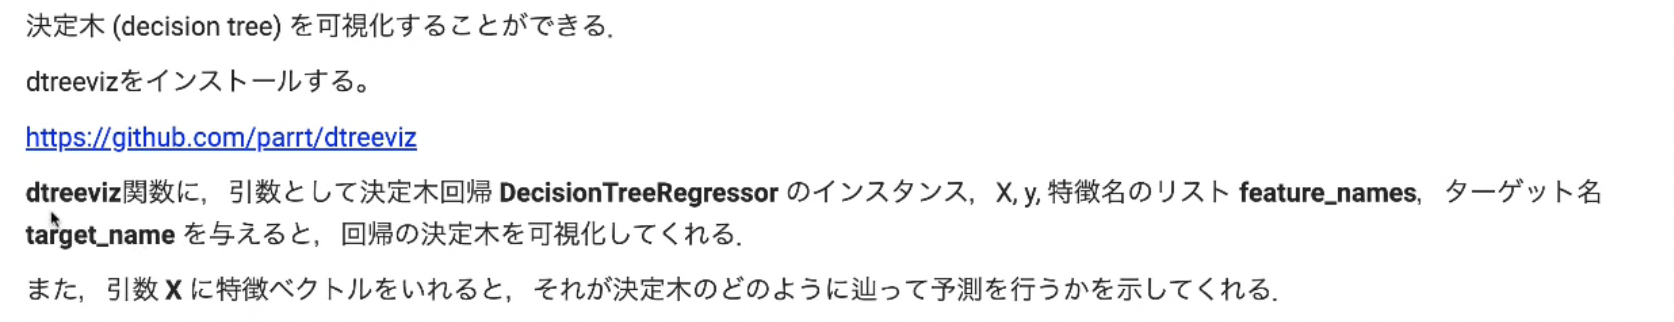

In [4]:
!pip install dtreeviz

     |████████████████████████████████| 62 kB 795 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67935 sha256=322cdd5765170cbfd17b2e800f3a4ff726435168422c930b977d52a5dd92fd92
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz


In [5]:
from sklearn import tree
import pandas as pd 
data = pd.read_csv('http://logopt.com/data/Advertising.csv', index_col =0) #0行目をインデックスにする．
X = data[['TV', 'Radio', 'Newspaper']] #特徴ベクトル
y = data['Sales'] #ターゲット

reg = tree.DecisionTreeRegressor(max_depth=2) #limit depth of tree,あんまり多いと見づらくなる
reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


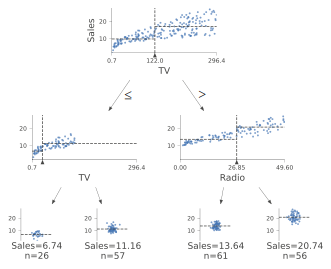

In [6]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    reg,
    X,
    y,
    feature_names = data.columns,
    target_name = "Sales"
)

display(viz)

#最初はTVの120ぐらいで分ける,それぞれの線分の平均をとって、分ける

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


22.1


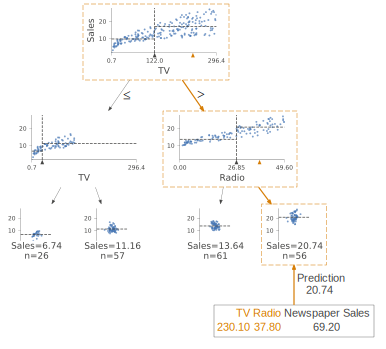

In [7]:
viz = dtreeviz(
    reg,
    X,
    y,
    feature_names = data.columns,
    target_name = "Sales",
    X = X.iloc[0]
)

print(y.iloc[0])
display(viz)

# 決定木の中身↓

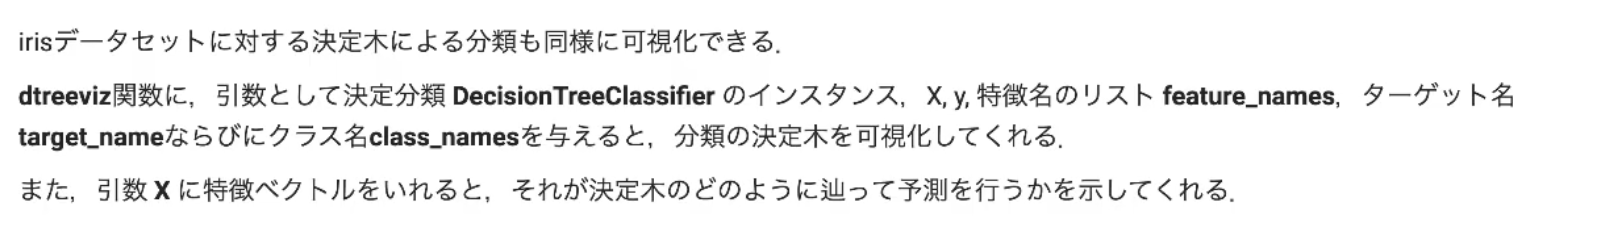

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


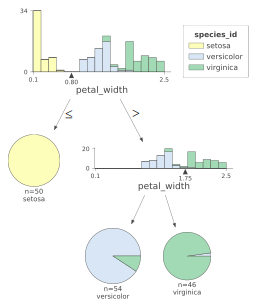

In [8]:
#分類(決定木)
import plotly.express as px

iris = px.data.iris()
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris['species_id']

classifier = tree.DecisionTreeClassifier(max_depth=2) #気の深さを2に設定
classifier.fit(X,y)

viz = dtreeviz(
    classifier,
    X,
    y,
    target_name = 'species_id',
    feature_names = ['sepal_length','sepal_width','petal_length','petal_width'],
    class_names = ['setosa', 'versicolor', 'virginica']
    )

display(viz)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



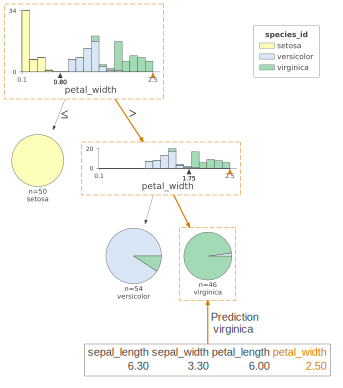

In [9]:
viz = dtreeviz(
    classifier,
    X,
    y,
    target_name = 'species_id',
    feature_names = ['sepal_length','sepal_width','petal_length','petal_width'],
    class_names = ['setosa', 'versicolor', 'virginica'],
    X = X.iloc[100]
    )

display(viz)

In [10]:
# 問題（アヤメ）
# irisデータセットにおける特徴ベクトルの重要度を計算せよ．

import plotly.express as px
iris = px.data.iris()
X = iris[ ['sepal_length','sepal_width','petal_length','petal_width'] ]
y = iris['species_id']